<a href="https://colab.research.google.com/github/notakshitgoyal/Computer_vision/blob/main/PyTorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [66]:
#getting dataset
train_data = datasets.FashionMNIST(
    root ="data",
    train = True,
    download = True,
    transform=ToTensor(),
    target_transform = None
)
test_data = datasets.FashionMNIST(
    root ="data",
    train = False,
    download = True,
    transform=ToTensor(),
    target_transform = None
)

In [67]:
len(train_data),len(test_data)

(60000, 10000)

In [68]:
#seeing first traing example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [69]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [70]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [71]:
image.shape

torch.Size([1, 28, 28])

In [72]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7cee8dd60df0>, <torch.utils.data.dataloader.DataLoader object at 0x7cee8dd63e80>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [73]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

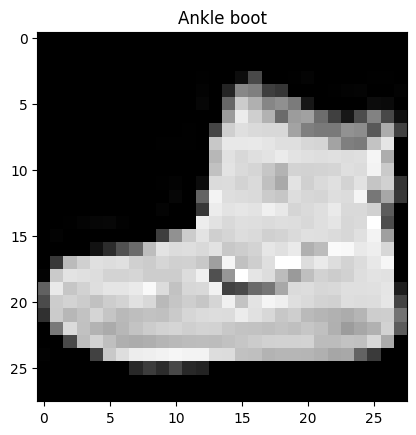

In [74]:
#visualizing our data
image , label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label)
plt.title(class_names[label])

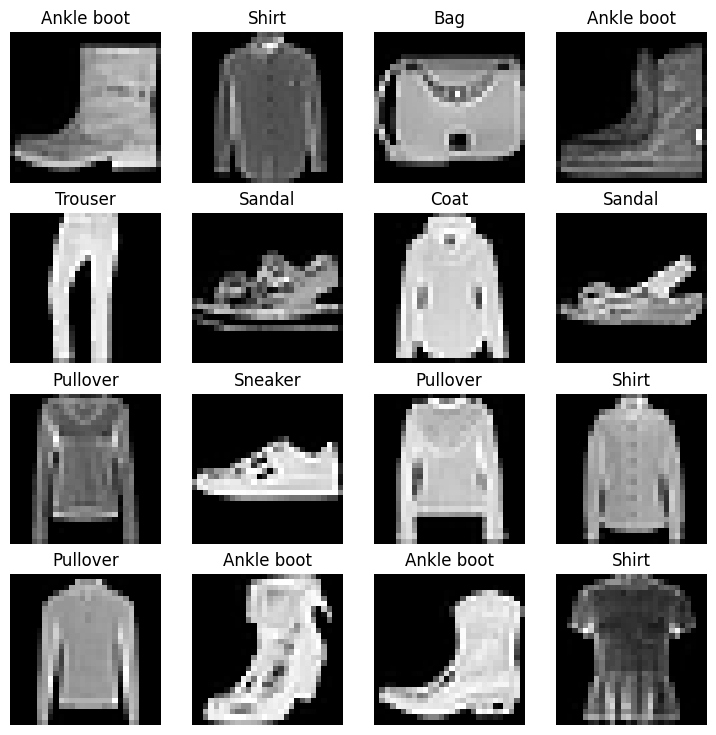

In [75]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [76]:
#create a flatten layer
flatten_model = nn.Flatten()
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [77]:
torch.manual_seed(42)
model_0=FashionMNISTModelV1(
    input_shape = 784,
    hidden_units = 10,
    output_shape=len(class_names)#one from every class
).to("cpu")

In [78]:
#loss function
import requests
from pathlib import Path
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py","wb") as f:
  f.write(request.content)

In [79]:
from helper_functions import accuracy_fn

In [80]:
loss_fn = nn.CrossEntropyLoss()

In [81]:
#optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1)

In [82]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time = end-start
  print(f"Train time on {device}:{total_time:.3f}secounds")

In [83]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 5

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 1.09199 | Test loss: 0.95636, Test acc: 65.00%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.78101 | Test loss: 0.72227, Test acc: 73.91%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.67027 | Test loss: 0.68500, Test acc: 75.02%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.64384 | Test loss: 0.65079, Test acc: 76.13%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
L

In [99]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

RuntimeError: ignored

In [85]:
torch.cuda.is_available()

True

In [86]:
#cnn model
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride =1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),

        nn.Linear(in_features= hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    return x

In [87]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to("cuda")

In [88]:
#stepping through nn conv2d
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(images.shape)


torch.Size([32, 3, 64, 64])


In [89]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 0.2024, -0.2504, -0.0134,  ...,  0.2792, -0.3610, -0.2566],
         [-0.0764, -0.7191,  0.2984,  ...,  0.3615,  0.6315,  0.6595],
         [-0.2137, -0.3899,  0.1102,  ...,  0.3512,  0.6649,  0.0560],
         ...,
         [-0.4276,  0.1331, -0.8694,  ...,  1.1234,  0.0140, -0.9160],
         [ 0.1783, -0.2661,  0.4148,  ..., -1.0826, -0.3362, -0.5056],
         [-0.3468, -0.0785, -0.4956,  ...,  0.8305,  0.7456,  0.5456]],

        [[-0.5006,  0.4476, -0.1052,  ...,  0.3670, -0.0945,  0.3401],
         [ 0.2966,  0.5690,  0.5389,  ...,  0.1746,  0.2696, -0.1404],
         [-0.3154,  0.5931, -0.1658,  ...,  0.6388, -0.2363, -0.0625],
         ...,
         [ 0.4414, -1.0194,  0.8830,  ...,  0.1321, -0.3717,  0.3900],
         [ 0.9789, -0.2282, -0.4580,  ...,  0.6974, -0.1458,  0.0690],
         [-0.5247,  0.3804, -0.6464,  ...,  0.4280, -0.1108, -0.0864]],

        [[ 0.1514, -0.4079,  0.3463,  ...,  0.2544, -0.4861, -0.5154],
         [-0.4716, -0.4686,  0.9058,  ..., -0

In [90]:
#stepping through maxpool2d
print(f"orignal shape:{test_image.shape}")
max_pool_layer= nn.MaxPool2d(kernel_size=2)
test_image_through_conv=conv_layer(test_image)
print(test_image_through_conv.shape)
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(test_image_through_conv_and_max_pool.shape)

orignal shape:torch.Size([3, 64, 64])
torch.Size([10, 64, 64])
torch.Size([10, 32, 32])


In [91]:
device = "cuda"

In [92]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [93]:
#training cnn
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr = 0.1)

from timeit import default_timer as timer
train_time_start_model_2=timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device = device)
  train_time_end_model_2 = timer()
  total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14

In [105]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Move the input tensor to the GPU
            X = X.to("cuda")

            # Move the target tensor to the GPU
            y = y.to("cuda")

            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))  # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": "FashionMNISTModelV2",  # Specify the model class name as a string
            "model_loss": loss.item(),
            "model_acc": acc}

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results


torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10,

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32913854718208313,
 'model_acc': 88.10902555910543}

In [107]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV1,0.652765,75.948482
1,FashionMNISTModelV2,0.329139,88.109026


In [108]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [109]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [110]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])


tensor([[1.3757e-06, 2.1817e-08, 1.4757e-07, 7.8368e-08, 3.7017e-09, 9.9676e-01,
         1.4210e-06, 9.9600e-07, 6.4299e-06, 3.2314e-03],
        [9.2498e-02, 7.1344e-01, 3.1355e-03, 6.0681e-02, 5.9178e-02, 1.1621e-03,
         5.8219e-02, 5.1617e-04, 1.0017e-02, 1.1551e-03]])

In [112]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

In [113]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 6, 4, 7, 1]))

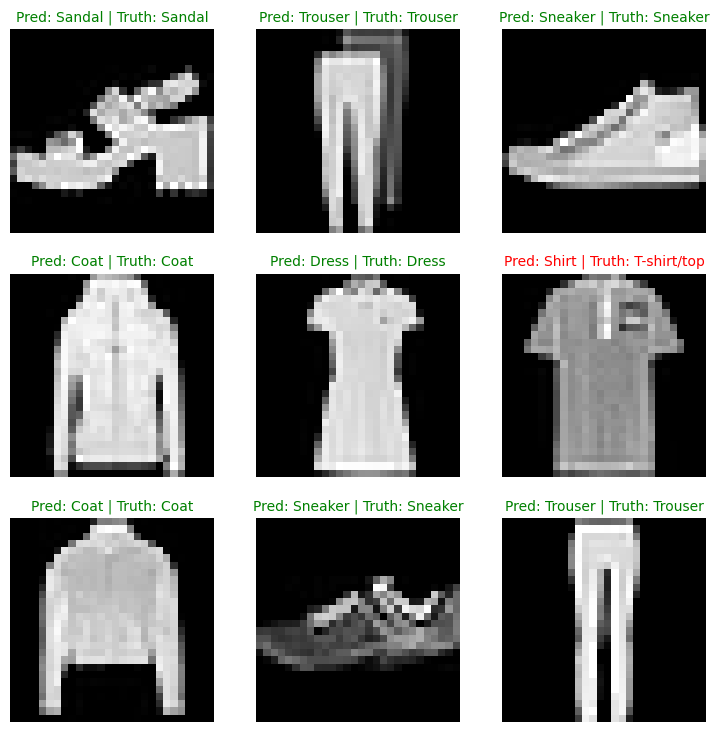

In [115]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);